# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></div><div class="lev2 toc-item"><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></div>

# Set Up
## Import Libraries

In [30]:
%matplotlib inline
import qcodes as qc
import visa
from qcodes.instrument_drivers.Keysight import B2962A
import time
import numpy as np
from matplotlib import pyplot as plt
# from standardFunctions import fitLinear
from scipy.optimize import curve_fit

plt.rcParams['axes.linewidth'] = 4.0
plt.rcParams['xtick.major.size'] = 12.0
plt.rcParams['xtick.major.width'] = 4.0
plt.rcParams['ytick.major.size'] = 12.0
plt.rcParams['ytick.major.width'] = 4.0
plt.rcParams['xtick.labelsize'] = 18.0
plt.rcParams['ytick.labelsize'] = 18.0
plt.rcParams['axes.labelsize'] = 24.0
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['lines.linewidth'] = 4.0
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams.update({'figure.autolayout': False})

In [2]:
rm = visa.ResourceManager()
rm.list_resources()

('USB0::0x0957::0x9018::MY52350641::INSTR', 'ASRL1::INSTR', 'ASRL2::INSTR')

In [34]:
powersource=B2962A.B2962A('powersource', 'USB0::0x0957::0x9018::MY52350641::INSTR')

Connected to: Agilent Technologies B2962A (serial:MY52350641, firmware:1.2.1501.1027) in 0.16s


In [4]:
powersource.parameters

{'IDN': <qcodes.instrument.parameter.StandardParameter: IDN at 4356009656>,
 'curr1': <qcodes.instrument.parameter.StandardParameter: curr1 at 4462493032>,
 'curr2': <qcodes.instrument.parameter.StandardParameter: curr2 at 4462492248>,
 'mode1': <qcodes.instrument.parameter.StandardParameter: mode1 at 4485628200>,
 'mode2': <qcodes.instrument.parameter.StandardParameter: mode2 at 4485628368>,
 'output1': <qcodes.instrument.parameter.StandardParameter: output1 at 4462493424>,
 'output2': <qcodes.instrument.parameter.StandardParameter: output2 at 4462493648>,
 'timeout': <qcodes.instrument.parameter.StandardParameter: timeout at 4462491632>,
 'voltage1': <qcodes.instrument.parameter.StandardParameter: voltage1 at 4462492752>,
 'voltage2': <qcodes.instrument.parameter.StandardParameter: voltage2 at 4462492416>}

In [3]:
powersource.mode1()

'CURR'

In [5]:
powersource.mode2()

'CURR'

In [50]:
powersource.mode1.set('CURR')
powersource.curr1.set(1e-6)
powersource.mode2.set('CURR')
powersource.voltage1.set(0)
# powersource.com

In [6]:
powersource.output1.set('ON')
powersource.output2.set('ON')

In [5]:
powersource.output1.set('OFF')
powersource.output2.set('OFF')


In [7]:
print("Output Voltage Is:", powersource.voltage1.get())
print(powersource.voltage2.get())

Output Voltage Is: 0.0001
0.01644


In [17]:
# powersource.curr1.set(0.000)
powersource.curr1.sweep(0, 0.0001, step = 0.00001)
powersource.curr1.set_delay(1)

In [ ]:
num = 100
currents = np.zeros(num)
voltages = np.zeros(num)
for i in range(0, num):
    curr = float(i/100000.0)
    print(curr)
    powersource.curr1.set(curr)
    time.sleep(0.1)
    voltages[i] = powersource.voltage2.get()
    currents[i] = powersource.curr1.get()
    time.sleep(0.1)
    
    

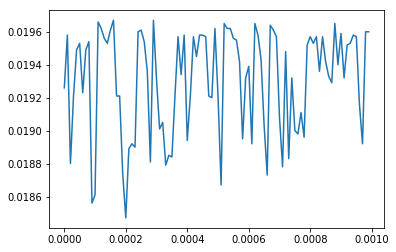

In [44]:
plt.plot(currents, voltages)

In [37]:
powersource.output1('OFF')
powersource.output2('OFF')


s = powersource.curr1.sweep(start=-0.00001, stop=0.00001, num = 51)
l = qc.Loop(s, delay = 1).each(powersource.voltage2)
data = l.get_data_set('Data/Current21Voltage43')

Started at 2017-11-22 16:39:57
DataSet:
   location = 'Data/Current21Voltage43'
   <Type>   | <array_id>            | <array.name> | <array.shape>
   Setpoint | powersource_curr1_set | curr1        | (51,)
   Measured | powersource_voltage2  | voltage2     | (51,)
Finished at 2017-11-22 16:40:50


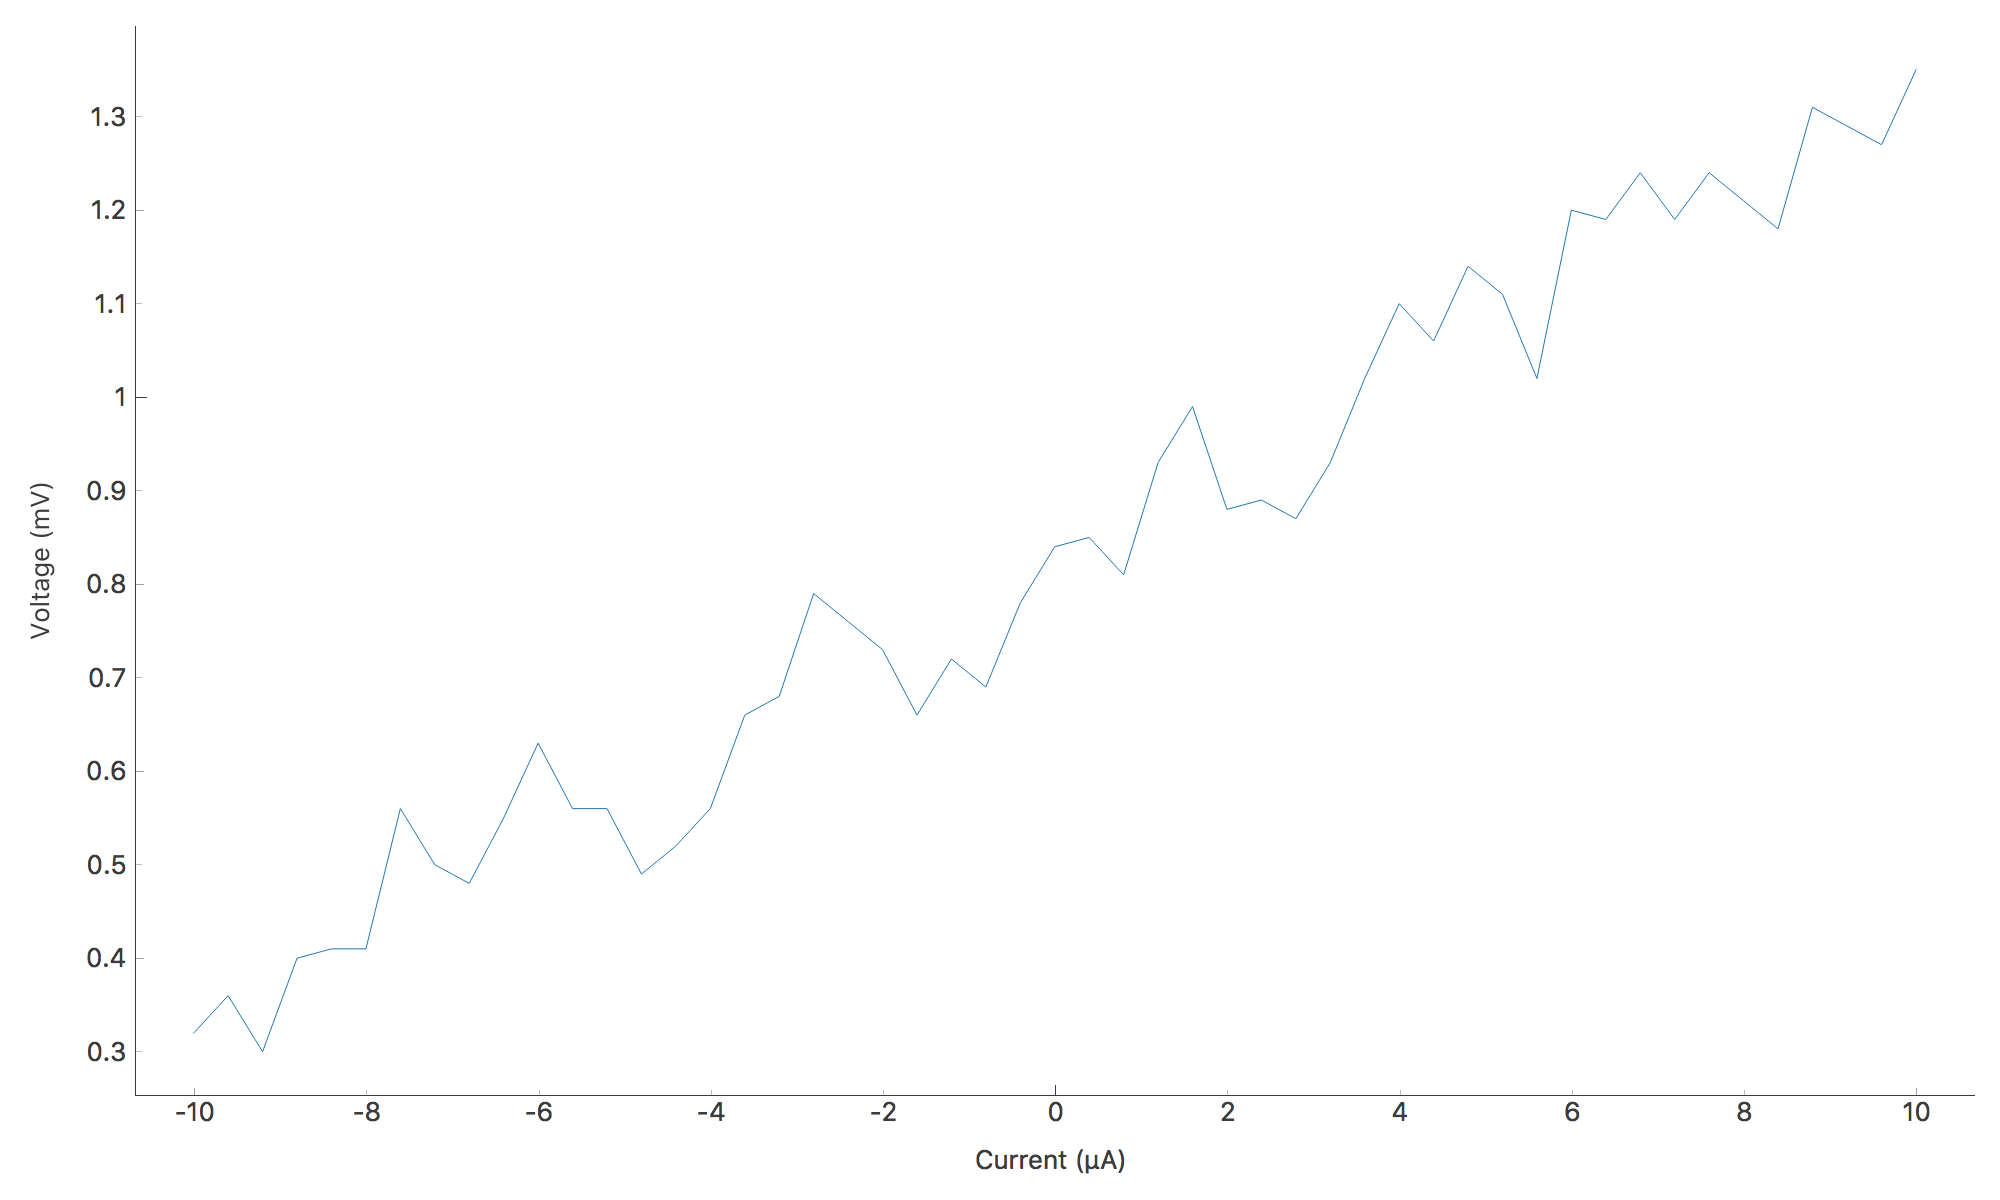

In [38]:
powersource.output1('ON')
powersource.output2('ON')


plotq = qc.QtPlot()
plotq.add(data.powersource_curr1_set, data.powersource_voltage2)
l.with_bg_task(plotq.update)
l.run()
plotq

In [39]:
data3434 = qc.load_data('Data/Current34Voltage34')
data1212 = qc.load_data('Data/Current12Voltage12')
data1234 = qc.load_data('Data/Current12Voltage34')
data2143 = qc.load_data('Data/Current21Voltage43')

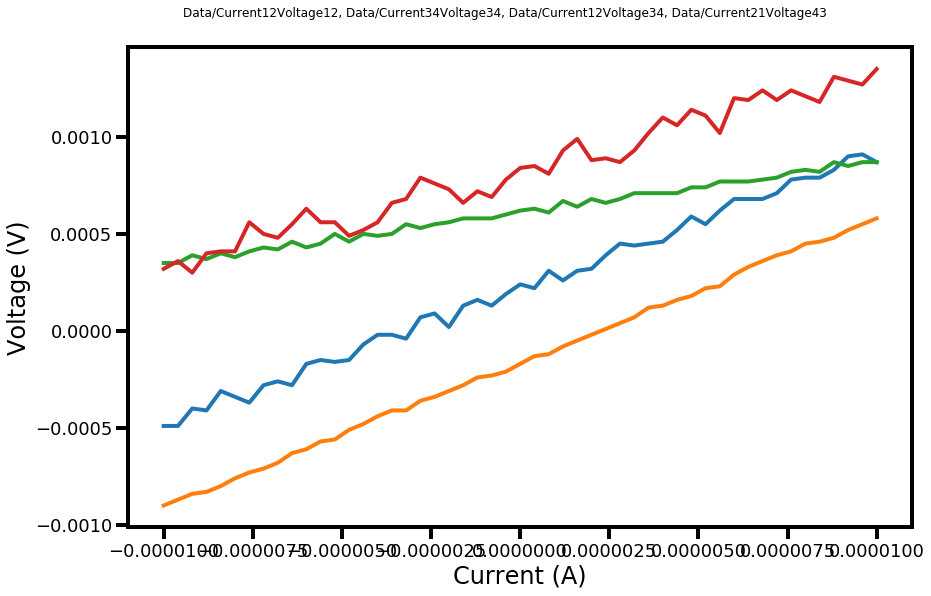

In [40]:
plotBoring = qc.MatPlot(figsize=(12,8))
plotBoring.add(data1212.powersource_curr1_set, data1212.powersource_voltage1)
plotBoring.add(data3434.powersource_curr2_set, data3434.powersource_voltage2)
plotBoring.add(data1234.powersource_curr1_set, data1234.powersource_voltage2)
plotBoring.add(data2143.powersource_curr1_set, data2143.powersource_voltage2)
plotBoring

In [23]:
def linEqn(x, a, c):
	return a*x + c

def fitLinear(xdata, ydata, bounds=None):
	values, pcov = curve_fit(linEqn, xdata, ydata, bounds)
	return values, pcov

In [21]:
data1234x = np.array(data1234.powersource_curr1_set.tolist())
data1234y = np.array(data1234.powersource_voltage2.tolist())

In [25]:
a, b = fitLinear(data1234x, data1234y)
a

array([  2.64434389e+01,   6.10588235e-04])

In [16]:
a, b = curve_fit(linEqn, data1234.arrays['powersource_curr1_set'], data1234.arrays['powersource_voltage2'])

TypeError: unsupported operand type(s) for *: 'numpy.float64' and 'DataArray'